In [3]:
#%cd /content/drive/MyDrive

/content/drive/MyDrive


In [2]:
#from google.colab import drive
#drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#%cd Amazon_data_cleaning

/content/drive/MyDrive/Amazon_data_cleaning


In [5]:
#!ls


Amazon_Reviews.csv  model.h5  model.json  train.ft.txt	Untitled.csv


In [6]:
#!tar -xjf train.ft.txt.bz2

tar (child): train.ft.txt.bz2: Cannot open: No such file or directory
tar (child): Error is not recoverable: exiting now
tar: Child returned status 2
tar: Error is not recoverable: exiting now


In [ ]:
#!bzip2 -d train.ft.txt.bz2

In [5]:
import pandas as pd
df = pd.read_fwf('train.ft.txt')

KeyboardInterrupt: 

In [172]:
df1=df[1:50000]

In [174]:
df1.reset_index

<bound method DataFrame.reset_index of        __label__2  \
1      __label__2   
2      __label__2   
3      __label__2   
4      __label__2   
5      __label__1   
...           ...   
49995  __label__1   
49996  __label__2   
49997  __label__2   
49998  __label__2   
49999  __label__2   

      Stuning even for the non-gamer: This sound track was beautiful! It paints the senery in your mind so well I would recomend it even to people who hate vid. game music! I have played the game Chrono Cross but out of all of the games I have ever played it has the best music! It backs away from crude keyboarding and takes a fresher step with grate guitars and soulful orchestras. It would impress anyone who cares to listen! ^_^  \
1      Amazing!: This soundtrack is my favorite music...                                                                                                                                                                                                                        

In [175]:
df1.columns = df1.iloc[0,:].values

In [176]:
df1.columns = ['V', 'text', 'X']

In [177]:
df1.drop(columns='V',inplace=True)

C:\Users\irene\AppData\Local\Temp\ipykernel_27396\536711520.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop(columns='V',inplace=True)


In [178]:
df1.drop(columns='X',inplace=True)

C:\Users\irene\AppData\Local\Temp\ipykernel_27396\3311699238.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop(columns='X',inplace=True)


In [179]:
df1

,text
1,Amazing!: This soundtrack is my favorite music...
2,Excellent Soundtrack: I truly like this soundt...
3,"Remember, Pull Your Jaw Off The Floor After He..."
4,an absolute masterpiece: I am quite sure any o...
5,"Buyer beware: This is a self-published book, a..."
...,...
49995,"Pit Bull 6"" LCD Digital Caliper: This Caliper ..."
49996,Good Quality for the Price: These aren't great...
49997,A must have if your going to reload: I used it...
49998,"It measures stuff, better now!: Out of the box..."


In [180]:
%pip install vaderSentiment

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [181]:
df2=df1

In [182]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import nltk
#nltk.download('vader_lexicon')

sentiments = SentimentIntensityAnalyzer()

df1["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in df1["text"]]
df1["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in df1["text"]]
df1["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in df1["text"]]
df1["Compound"] = [sentiments.polarity_scores(i)["compound"] for i in df1["text"]]

C:\Users\irene\AppData\Local\Temp\ipykernel_27396\3702742849.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in df1["text"]]
C:\Users\irene\AppData\Local\Temp\ipykernel_27396\3702742849.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in df1["text"]]
C:\Users\irene\AppData\Local\Temp\ipykernel_27396\3702742849.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy 

In [183]:
df1

,text,Positive,Negative,Neutral,Compound
1,Amazing!: This soundtrack is my favorite music...,0.264,0.062,0.674,0.9847
2,Excellent Soundtrack: I truly like this soundt...,0.282,0.086,0.632,0.9814
3,"Remember, Pull Your Jaw Off The Floor After He...",0.280,0.000,0.720,0.9840
4,an absolute masterpiece: I am quite sure any o...,0.253,0.014,0.733,0.9909
5,"Buyer beware: This is a self-published book, a...",0.064,0.113,0.824,-0.8653
...,...,...,...,...,...
49995,"Pit Bull 6"" LCD Digital Caliper: This Caliper ...",0.144,0.037,0.819,0.8264
49996,Good Quality for the Price: These aren't great...,0.179,0.049,0.772,0.8898
49997,A must have if your going to reload: I used it...,0.226,0.000,0.774,0.9001
49998,"It measures stuff, better now!: Out of the box...",0.122,0.014,0.864,0.9215


In [184]:
print(type(df1))

<class 'pandas.core.frame.DataFrame'>


In [185]:
df1['Sentiment'] = df1['Compound'].apply(lambda x: 'positive' if x >0 else 'neutral' if x==0 else 'negative')

C:\Users\irene\AppData\Local\Temp\ipykernel_27396\1628481642.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Sentiment'] = df1['Compound'].apply(lambda x: 'positive' if x >0 else 'neutral' if x==0 else 'negative')


In [186]:
df1.rename(columns={'text':'Text'},inplace=True)

C:\Users\irene\AppData\Local\Temp\ipykernel_27396\1042997814.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.rename(columns={'text':'Text'},inplace=True)


In [187]:
df1.drop(columns='Positive',inplace=True)

C:\Users\irene\AppData\Local\Temp\ipykernel_27396\3750084503.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop(columns='Positive',inplace=True)


In [188]:
df1.drop(columns='Negative',inplace=True)

C:\Users\irene\AppData\Local\Temp\ipykernel_27396\983557501.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop(columns='Negative',inplace=True)


In [189]:
df1.drop(columns='Compound',inplace=True)

C:\Users\irene\AppData\Local\Temp\ipykernel_27396\3667048869.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop(columns='Compound',inplace=True)


In [190]:
df1.drop(columns='Neutral',inplace=True)

C:\Users\irene\AppData\Local\Temp\ipykernel_27396\2323874965.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop(columns='Neutral',inplace=True)


In [191]:
df2=df1[df1['Sentiment']!='neutral']

In [192]:
df2['Sentiment'].value_counts()

Sentiment
positive    35660
negative    13765
Name: count, dtype: int64

In [193]:
df2 = df2.replace(to_replace='positive',value='1',inplace=True)

C:\Users\irene\AppData\Local\Temp\ipykernel_27396\3269864285.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2 = df2.replace(to_replace='positive',value='1',inplace=True)


In [194]:
df2

In [195]:
#df2.to_csv('Amazon_Reviews.csv',index=False)

In [196]:
#df2.head(1)

In [197]:
df2

In [6]:
import pandas as pd

In [7]:
df=pd.read_csv('Amazon_Reviews.csv')

In [8]:
df['Sentiment'].replace({'positive':1,'negative':0},inplace=True)

In [9]:
df

,Text,Sentiment
0,Amazing!: This soundtrack is my favorite music...,1
1,Excellent Soundtrack: I truly like this soundt...,1
2,"Remember, Pull Your Jaw Off The Floor After He...",1
3,an absolute masterpiece: I am quite sure any o...,1
4,"Buyer beware: This is a self-published book, a...",0
...,...,...
59994,squirlll's review: i have not puchased the out...,0
59995,Awsome collection: This has it all that I saw ...,1
59996,I can't wait for it to come out!: I've watched...,1
59997,A Blast From My Past: This was one of my favor...,1


In [10]:
import nltk
import string
import re
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words_list = stopwords.words("english")

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r"\n", " ", text)
    text = re.sub(r"\d", " ", text)
    text = re.sub(r"<.*?>+", "", text)
    text = re.sub(r"\[.*?\]", "", text)
    text = re.sub(r"https?://S+|www.\.\S+", "", text)
    text = text.translate(str.maketrans("", "", string.punctuation))
    words = text.split()
    words = [word for word in words if not word in stop_words_list]
    words = [re.sub(r"(.)\1{1,}", r"\1\1", word) for word in words]
    words = [word.strip() for word in words if len(word.strip()) > 1]
    text = " ".join(words)
    return text

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\irene\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [11]:
df["Text"] = df["Text"].apply(preprocess_text)

In [12]:
from nltk import SnowballStemmer

stemmer = SnowballStemmer("english")

def stemming(text):
    stemmed_text = ""
    for word in text.split():
        stem = stemmer.stem(word)
        stemmed_text += stem
        stemmed_text += " "

    stemmed_text = stemmed_text.strip()
    return stemmed_text

In [13]:
df["Text"] = df["Text"].apply(stemming)

In [14]:
import nltk

In [15]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\irene\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [16]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\irene\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [17]:
def lemmatization(text):
    final_text = []
    text = text.lower()
    text = nltk.word_tokenize(text)

    for word in text:

         lemma = nltk.WordNetLemmatizer()
         word = lemma.lemmatize(word)
         final_text.append(word)
    return " ".join(final_text)

In [18]:
df['Text']=df['Text'].apply(lemmatization)

In [19]:
df

,Text,Sentiment
0,amaz soundtrack favorit music time hand intens...,1
1,excel soundtrack truli like soundtrack enjoy v...,1
2,rememb pull jaw floor hear youv play game know...,1
3,absolut masterpiec quit sure actual take time ...,1
4,buyer bewar selfpublish book want know whyread...,0
...,...,...
59994,squirll review puchas outlaw star box set seen...,0
59995,awsom collect saw sever year ago tv well extra...,1
59996,cant wait come ive watch whole seri cartoon ne...,1
59997,blast past one favorit show year ago dont reme...,1


In [20]:
# new = df[21632:21633]
# print(new)

In [21]:
X=df['Text']
y=df['Sentiment']

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
from nltk.tokenize import word_tokenize
from nltk import FreqDist

all_words=' '.join(X_train)
all_words=word_tokenize(all_words)
dist=FreqDist(all_words)
num_unique_word=len(dist)
num_unique_word # initial value to use for hyperparameterization

81574

In [25]:
MAX_REVIEW_LEN=0
for text in X_train:
    word=word_tokenize(text)
    l=len(word)
    MAX_REVIEW_LEN = max(MAX_REVIEW_LEN, l)

MAX_REVIEW_LEN

139

In [26]:
max_features = num_unique_word # find total number of unique words using word_tokenize
max_words = MAX_REVIEW_LEN  # find maximum length of words using word_tokenize
batch_size = 64
epochs = 10
num_classes=2

In [27]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(list(X_train))
X_train = tokenizer.texts_to_sequences(X_train)
X_val = tokenizer.texts_to_sequences(X_test)
#X_test = tokenizer.texts_to_sequences(test_text)

In [28]:
import tensorflow as tf
X_train =  tf.keras.utils.pad_sequences(X_train, maxlen=max_words)
X_val =  tf.keras.utils.pad_sequences(X_val, maxlen=max_words)
#X_test =  tf.keras.utils.pad_sequences(X_test, maxlen=max_words)
print(X_train.shape,X_val.shape)

(47999, 139) (12000, 139)


In [29]:
%pip install tensorflow

^C
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [30]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python import keras
from keras.preprocessing import sequence,text
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras.layers import Dense,Dropout,Embedding,LSTM,Conv1D,GlobalMaxPooling1D,Flatten,MaxPooling1D,GRU,SpatialDropout1D,Bidirectional
from keras.callbacks import EarlyStopping
from keras.utils import to_categorical
from keras.losses import categorical_crossentropy
from keras.optimizers import Adam

model= Sequential()
model.add(Embedding(max_features,100,input_length= max_words))
model.add(Dropout(0.2))

model.add(Conv1D(64,kernel_size=3,padding='same',activation='relu',strides=1))
model.add(GlobalMaxPooling1D())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(1,activation='sigmoid'))


model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

model.summary()

In [222]:
#new  = model.get_input_shape_at()
#print(new)

In [223]:
history=model.fit(X_train, y_train, validation_data=(X_val, y_test),epochs=epochs, batch_size=batch_size, verbose=1)
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_val, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type int).

In [ ]:
model_json=model.to_json()
with open("model_CNN.json","w") as json_file:
     json_file.write(model_json)

model.save_weights("model_CNN.h5")
print("Saved model to disk")

Saved model to disk


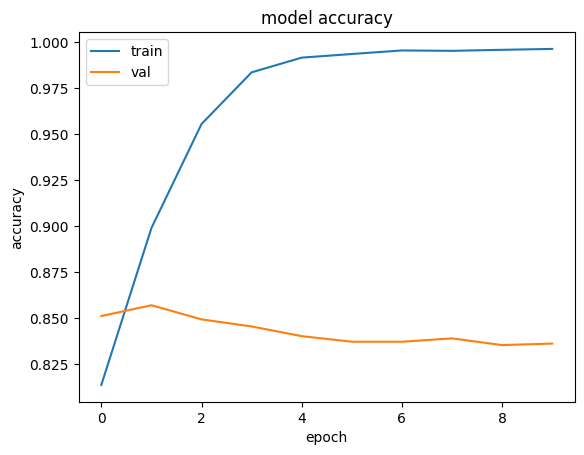

In [ ]:
import keras
from matplotlib import pyplot as plt
#history = model.fit(X_train, y_train,validation_split = 0.1, epochs=50, batch_size=4)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
import tensorflow
from tensorflow.keras.models import model_from_json
json_file1=open('model_CNN.json','r')
loaded_model_json=json_file1.read()
json_file1.close()
loaded_model=model_from_json(loaded_model_json)

loaded_model.load_weights("model_CNN.h5")

print("Loaded model from disk")
loaded_model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
score=loaded_model.evaluate(X_val,y_test,verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1],score[1]*100))

Loaded model from disk
accuracy: 83.62%


In [ ]:
import numpy as np
prediction = model.predict(X_val[10:20])
print("prediction shape:", np.argmax(prediction, axis=-1))

1/1 [==============================] - 0s 84ms/step
prediction shape: [0 0 0 0 0 0 0 0 0 0]


In [ ]:
y_test[10:20]

21632    0
48958    0
40950    0
40627    1
28147    1
35703    0
27642    0
39588    0
16933    1
28912    1
Name: Sentiment, dtype: int64

In [31]:
from keras.layers import GRU

model = Sequential()
model.add(Embedding(input_dim=max_features,output_dim=32,input_length=max_words))

model.add(GRU(32))
model.add(Dense(1, activation='sigmoid'))

In [32]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 139, 32)           2610368   
                                                                 
 gru (GRU)                   (None, 32)                6336      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 2616737 (9.98 MB)
Trainable params: 2616737 (9.98 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [33]:
model.fit(X_train, y_train, epochs = 10, batch_size=batch_size, validation_split=0.2)

loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_val, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type int).

In [ ]:
model_json=model.to_json()
with open("model_GRU.json","w") as json_file:
     json_file.write(model_json)

model.save_weights("model_GRU.h5")
print("Saved model to disk")

Saved model to disk


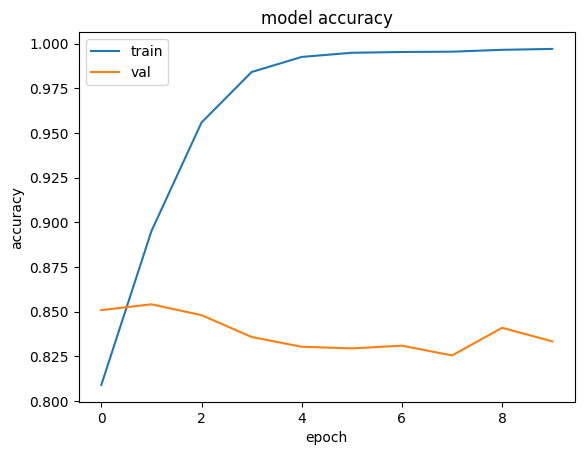

In [ ]:
import keras
from matplotlib import pyplot as plt
#history = model.fit(X_train, y_train,validation_split = 0.1, epochs=50, batch_size=4)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
%pip install scikit-plot

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
#import scikitplot as skplt
#skplt.metrics.plot_precision_recall_curve(X_train, y_train,
                     #  title="Digits Precision-Recall Curve", figsize=(12,6));

In [ ]:
import tensorflow
from tensorflow.keras.models import model_from_json
json_file1=open('model_GRU.json','r')
loaded_model_json=json_file1.read()
json_file1.close()
loaded_model=model_from_json(loaded_model_json)

loaded_model.load_weights("model_GRU.h5")

print("Loaded model from disk")
loaded_model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
score=loaded_model.evaluate(X_val,y_test,verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1],score[1]*100))

Loaded model from disk
accuracy: 84.59%


In [ ]:
import numpy as np
prediction = model.predict(X_val[10:20])
print("prediction shape:", np.argmax(prediction, axis=-1))

1/1 [==============================] - 0s 21ms/step
prediction shape: [0 0 0 0 0 0 0 0 0 0]


In [ ]:
y_test[10:20]

21632    0
48958    0
40950    0
40627    1
28147    1
35703    0
27642    0
39588    0
16933    1
28912    1
Name: Sentiment, dtype: int64